<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [2]:

# Your code here
import numpy as np

In [3]:
np.random.normal(loc=5, scale=2, size=10)

array([6.66312326, 5.64533692, 9.37417534, 5.60733875, 2.9553019 ,
       5.41534108, 3.74532237, 2.30664667, 5.76755218, 7.04331392])

### 1.2 Visualising the random numbers

In [5]:

# Your code here
import matplotlib.pyplot as plt

Text(0, 0.5, 'Value of random number')

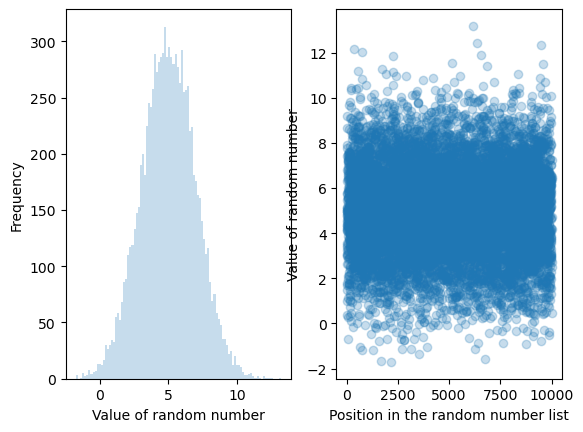

In [6]:
n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.3 68%?

In [ ]:

# Your code here


In [7]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 68.19%


## 1 Brownian Motion in 1D

### 1.1 The scenario

In [ ]:

# Your code here


### 1.2 The simulation

In [ ]:

# Your code here


In [3]:
def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

import numpy.random as rnd

no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

NameError: name 'plt' is not defined

### 1.3 What does theory say?

In [ ]:

# Your code here


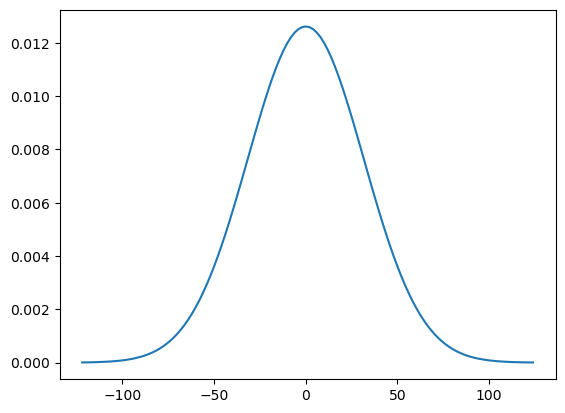

In [14]:
def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

prob_right=0.5
prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')

## 2 Estimating \(\pi\)

### 2.1 The method

In [ ]:

# Your code here


### 2.2 A poor but intuitive solution

In [ ]:

# Your code here


In [15]:
N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi

3.14808

### 2.3 A better solution

In [ ]:

# Your code here


In [16]:
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!

4 * (N_green / N_total)

3.142408

### 2.4 A smarter solution

In [22]:

# Your code here


In [17]:
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.13928

## Exercise 1 :  Vital Stats of Random π

In [63]:



# Your solution here



In [58]:
def estimate_pi(n):
    x=rnd.rand(n)
    y=rnd.rand(n)
    N_green=np.sum((x**2+y**2) <= 1)
    return 4 * (N_green / n)

print(np.mean([estimate_pi(10000) for _ in range(100)]))
print(np.std([estimate_pi(10000) for _ in range(100)]))

3.1428320000000003
0.016213771923892322


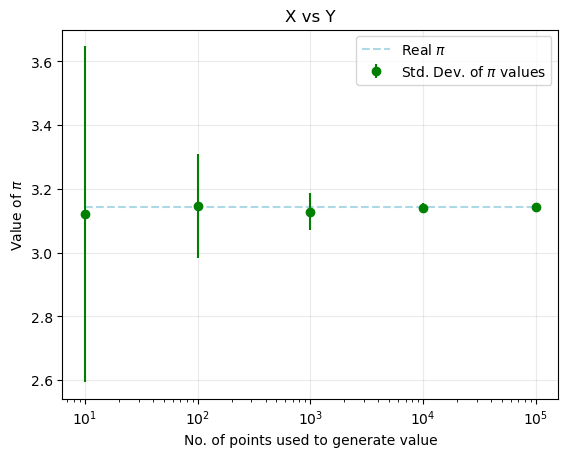

In [88]:
import matplotlib.pyplot as plt

means=[]
std=[]
for n in range(1,6):
    means.append(np.mean([estimate_pi(10**n) for _ in range(100)]))
    std.append(np.std([estimate_pi(10**n) for _ in range(100)]))


x=[]
x_pi=[10, 100000]
y_pi=[np.pi, np.pi]
x_value=[10, 10**2, 10**3, 10**4, 10**5]
y_value=[]
plt.plot(x_pi, y_pi, color='lightblue', linestyle='dashed', label='Real $\pi$')
plt.xlabel('No. of points used to generate value')
plt.xscale('log')
plt.ylabel("Value of $\pi$")
plt.errorbar(x_value, means, yerr = std, color = "green", fmt='o', label = "Std. Dev. of $\pi$ values")
# plt.ylim([2.9,3.6])
plt.title('X vs Y')
plt.grid(alpha=.25)
plt.legend(loc='upper right')
plt.show()